In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. Like your previous implementation of gradient descent, this model performs best with normalized inputs. sklearn.preprocessing.StandardScaler will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [4]:
x_train, y_train = load_house_data()
x_features = ['size(sqft)','bedrooms','floors','age']

In [5]:
# for this lab we are using methods from the Scikit-learn library, don't worry about not knowing syntax
scaler = StandardScaler() # normalizing function
x_norm = scaler.fit_transform(x_train) # normalize data
print(f"Peak to Peak range by column in Raw x:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized x:{np.ptp(x_norm,axis=0)}")

Peak to Peak range by column in Raw x:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized x:[5.85 6.14 2.06 3.69]


In [6]:
sgdr = SGDRegressor(max_iter=1000) # new regression model
sgdr.fit(x_norm, y_train) # fit regression mdoel to data
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 151, number of weight updates: 14950.0


In [9]:
# notice how Scikit's regression model gives us nearly identical parameters to our regression model
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w:{w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters: w:[110.44 -21.15 -32.58 -38.01], b:[363.15]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [11]:
# now we can make a prediction using w,b. 
y_pred_sgd = sgdr.predict(x_norm) # Scikit prediction algorithim
y_pred = np.dot(x_norm, w_norm) + b_norm  # our prediction algorithim using NumPy
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set: {y_pred[:4]}" )
print(f"Target values: {y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set: [295.14 486.07 389.65 492.24]
Target values: [300.  509.8 394.  540. ]


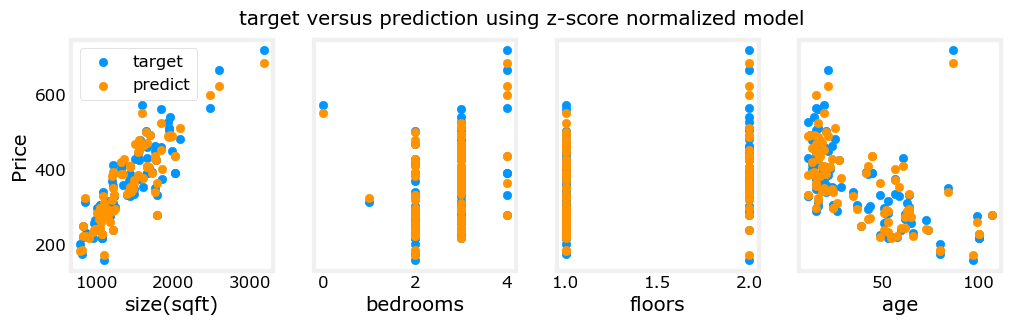

In [13]:
# plot predictions and targets vs original features for easy visualization
# notice that by using the Scikit-learn library, our code still works almost exactly the same and is much shorter
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()